In [1]:
import pandas as pd
import numpy as np
import fiona
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import Point
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

blocks = pd.read_csv('..//data//census//tl_2010_06075_tabblock10.csv')
block_neigh = pd.read_csv('..//data//created//block_neigh_2.csv')

In [19]:
block_neigh

,stfid,Neighborhood
0,6.075017e+13,Duboce Triangle
1,6.075021e+13,Mission
2,6.075012e+13,Lower Nob Hill
3,6.075018e+13,South of Market
4,6.075021e+13,Mission
5,6.075012e+13,Tenderloin
6,6.075013e+13,Tenderloin
7,6.075013e+13,Tenderloin
8,6.075020e+13,Mission
9,6.075013e+13,Tenderloin


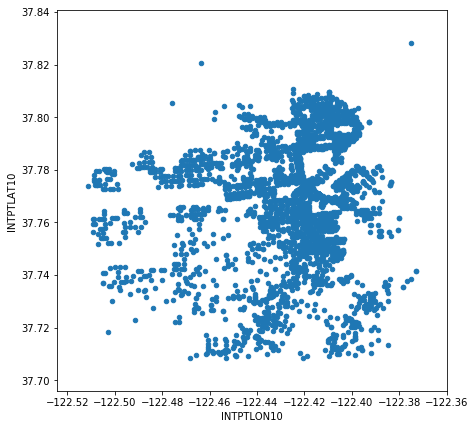

In [24]:
test = blocks.merge(block_neigh, left_on='GEOID10', right_on='stfid')
test[test['Neighborhood']=='Duboce Triangle']
test.plot(kind='scatter',y='INTPTLAT10',x='INTPTLON10',figsize=(7,7))

In [6]:
blocks = pd.read_csv('..//data//census//tl_2010_06075_tabblock10.csv')

geom = []
shape_loc = 'Census 2000_ Blocks for San Francisco (no water)//geo_export_10e804e3-5dd0-4986-9466-956443c0fd64.shp'
lats, lons = [], []
c = fiona.open("..//data//sf_open//{}".format(shape_loc))

for i in range(0,len(blocks)):
    pol = c.next()
    geom.append(shape(pol['geometry']))
    try:
        lons.append(shape(pol['geometry']).exterior.centroid.xy[0][0])
        lats.append(shape(pol['geometry']).exterior.centroid.xy[1][0])
    except:
        lons.append(blocks['INTPTLON10'][i])
        lats.append(blocks['INTPTLAT10'][i])
    
blocks['geom'] = geom
blocks['lats'] = lats
blocks['lons'] = lons

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  if __name__ == '__main__':


StopIteration: 

In [3]:
blocks_use = blocks.merge(block_neigh, left_on='GEOID10', right_on='block_fips')

neighs = [
    
    'Tenderloin',
    'South of Market',
    'Downtown',
    'Inner Mission',
    'Van Ness/Civic Center',
    'Duboce Triangle',
    'Haight Ashbury',
    'Miraloma Park',
    'Financial District/Barbary Coast',
    'Silver Terrace' 
]

KeyError: 'block_fips'

In [4]:
blocks_use[blocks_use['Neighborhood']=='Haight Ashbury'].plot(kind='scatter',
                                                         x='lats',
                                                         y='lons')

NameError: name 'blocks_use' is not defined

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


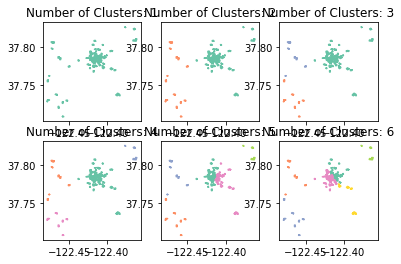

In [312]:
blocks_clus = blocks_use[(blocks_use['lats']<37.765)&
                        (blocks_use['lats']>37.745)&
                        (blocks_use['lons']<-122.41)&
                        (blocks_use['lons']>-122.42)]
blocks_clus = blocks_use[blocks_use['Neighborhood']=='Tenderloin']

for i in range(1,7):

    # create clusters
    num_clus = i
    km = KMeans(n_clusters=num_clus)
    km = km.fit(blocks_clus[['lats','lons']])

    # assign new cluster labels
    blocks_clus['new_block_group'] = km.predict(blocks_clus[['lats','lons']])

    # dictionary for different colors
    color_dict = {

        0:'#66c2a5',
        1:'#fc8d62',
        2:'#8da0cb',
        3:'#e78ac3',
        4:'#a6d854',
        5:'#ffd92f'
    }

    # plot the different clusters
    for cluster in range(0,num_clus):
        data_clus = blocks_clus[blocks_clus['new_block_group']==cluster]
        plt.subplot(2,3,i)
        for g in data_clus['geom']:
            try:
                x,y = g.exterior.xy
                plt.plot(x, y, c=color_dict[cluster])
                plt.title('Number of Clusters: {}'.format(i))
                #plt.ylim((37.74,37.77))
                #plt.xlim((-122.433,-122.40))
                plt.axes.get_xaxis().set_ticks([]);
            except:
                pass

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.


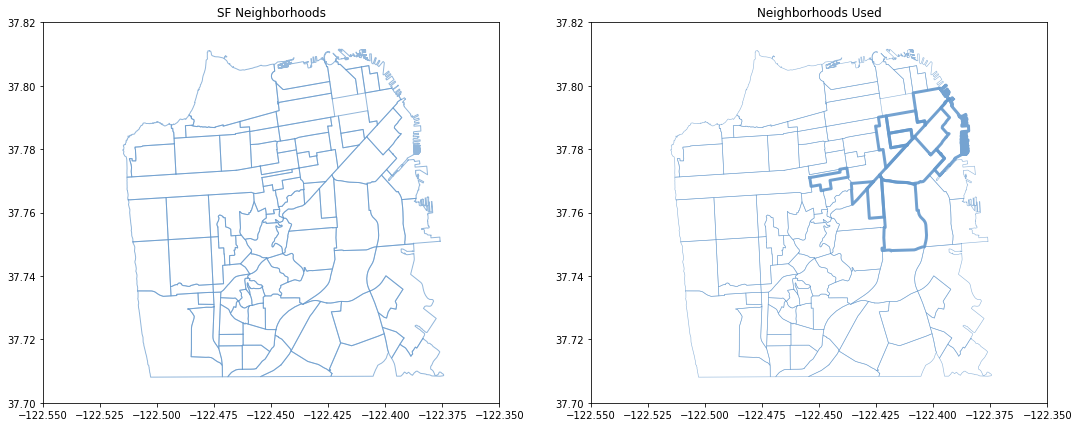

In [89]:
ids = ['86','13','72','17','31','47','78','73','14','25']

c = fiona.open("..//data//sf_open//geo_export_d30ee75b-b941-4798-962c-05f777bc2084.shx")

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)

for i in range(0,90):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    try:
        x,y = geom.exterior.xy
        plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=1)
        plt.ylim((37.70,37.82))
        plt.xlim((-122.55,-122.35))
        plt.title('SF Neighborhoods')
        
    except:
        pass

c = fiona.open("..//data//sf_open//geo_export_d30ee75b-b941-4798-962c-05f777bc2084.shx")
plt.subplot(1,2,2)

for i in range(0,90):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    if pol['id'] in ids:
    
        try:
            x,y = geom.exterior.xy
            plt.plot(x, y, color='#6699cc', alpha=0.9,linewidth=3)
            plt.ylim((37.70,37.82))
            plt.xlim((-122.55,-122.35))
            plt.title('Neighborhoods Used')

        except:
            pass
    else:
        try:
            x,y = geom.exterior.xy
            plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=.6)
            plt.ylim((37.70,37.82))
            plt.xlim((-122.55,-122.35))
            plt.title('Neighborhoods Used')

        except:
            pass

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.


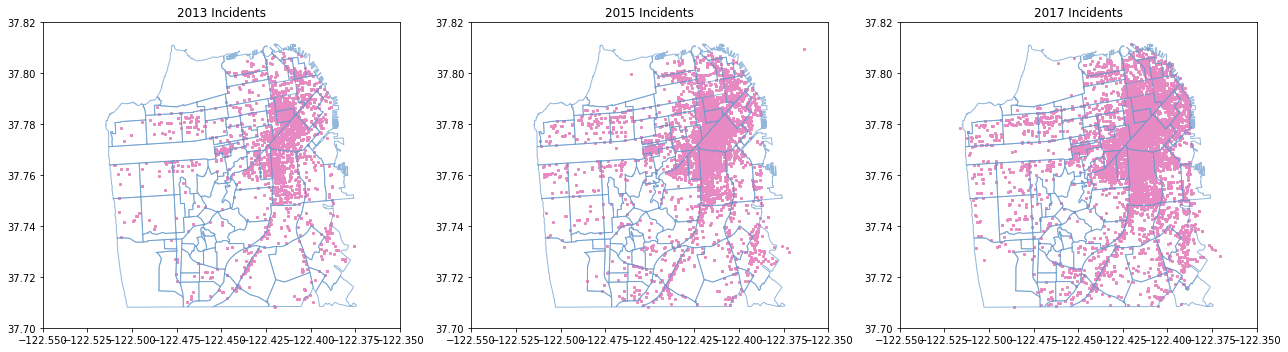

In [289]:
cases_poop = pd.read_csv('..//data//created//311_cases_clean.csv')
cases_poop['Opened'] = pd.to_datetime(cases_poop['Opened'])
cases_poop['day_of_week'] = cases_poop['Opened'].dt.dayofweek
cases_poop['year'] = cases_poop['Opened'].dt.year
cases_poop['month'] = cases_poop['Opened'].dt.month
cases_poop['hour'] = cases_poop['Opened'].dt.hour

x_2013 = cases_poop[cases_poop['year']==2013]['Longitude']
y_2013 = cases_poop[cases_poop['year']==2013]['Latitude']

x_2015 = cases_poop[cases_poop['year']==2015]['Longitude']
y_2015 = cases_poop[cases_poop['year']==2015]['Latitude']

x_2017 = cases_poop[cases_poop['year']==2017]['Longitude']
y_2017 = cases_poop[cases_poop['year']==2017]['Latitude']

c = fiona.open("..//data//sf_open//geo_export_d30ee75b-b941-4798-962c-05f777bc2084.shx")

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)

for i in range(0,90):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    try:
        x,y = geom.exterior.xy
        
        plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=1)
        plt.ylim((37.70,37.82))
        plt.xlim((-122.55,-122.35))
        plt.title('2013 Incidents')
        
    except:
        pass
    plt.scatter(x_2013, y_2013, alpha=0.1,color='#e78ac3', s=1)

c = fiona.open("..//data//sf_open//geo_export_d30ee75b-b941-4798-962c-05f777bc2084.shx")
plt.subplot(1,3,2)    
for i in range(0,90):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    try:
        x,y = geom.exterior.xy
        plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=1)
        plt.ylim((37.70,37.82))
        plt.xlim((-122.55,-122.35))
        plt.title('2015 Incidents')
        
    except:
        pass
    plt.scatter(x_2015, y_2015, alpha=0.1,color='#e78ac3', s=1)

c = fiona.open("..//data//sf_open//geo_export_d30ee75b-b941-4798-962c-05f777bc2084.shx")
plt.subplot(1,3,3) 
for i in range(0,90):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    try:
        x,y = geom.exterior.xy
        plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=1)
        plt.ylim((37.70,37.82))
        plt.xlim((-122.55,-122.35))
        plt.title('2017 Incidents')
        
    except:
        pass
    plt.scatter(x_2017, y_2017, alpha=0.1,color='#e78ac3', s=1)
    plt.tight_layout();

In [287]:
cases_poop['Opened'] = pd.to_datetime(cases_poop['Opened'])
cases_poop['day_of_week'] = cases_poop['Opened'].dt.dayofweek
cases_poop['year'] = cases_poop['Opened'].dt.year
cases_poop['month'] = cases_poop['Opened'].dt.month
cases_poop['hour'] = cases_poop['Opened'].dt.hour

x_2013 = cases_poop[cases_poop['year']==2013]['Longitude']
y_2013 = cases_poop[cases_poop['year']==2013]['Latitude']

x_2015 = cases_poop[cases_poop['year']==2015]['Longitude']
y_2015 = cases_poop[cases_poop['year']==2015]['Latitude']

x_2017 = cases_poop[cases_poop['year']==2017]['Longitude']
y_2017 = cases_poop[cases_poop['year']==2017]['Latitude']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

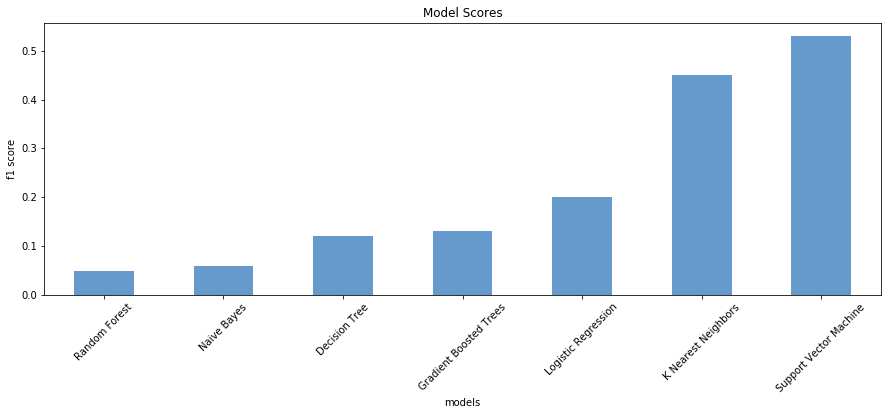

In [302]:
scores = [
    .05,
    .06,
    .12,
    .13,
    .20,
    .45,
    .53
]
models = [
    'Random Forest',
    'Naive Bayes',
    'Decision Tree',
    'Gradient Boosted Trees',
    'Logistic Regression',
    'K Nearest Neighbors',
    'Support Vector Machine'
]

pd.DataFrame({'f1 score':scores, 'models':models}).plot(kind='bar',
                                                        x='models',
                                                        y='f1 score',
                                                       legend=False,
                                                       color='#6699cc',
                                                       title='Model Scores',
                                                       figsize=(15,5))
plt.ylabel('f1 score')
plt.xticks(rotation=45)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  if __name__ == '__main__':


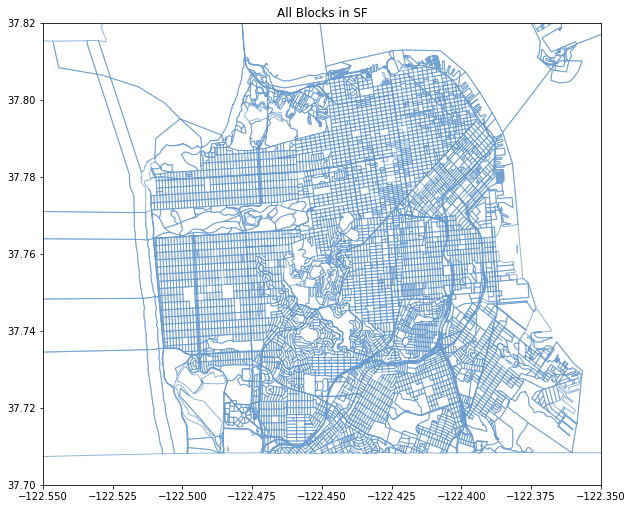

In [346]:
blocks = pd.read_csv('..//data//census//tl_2010_06075_tabblock10.csv')
blocks = blocks[blocks['ALAND10'].isin(blocks.ALAND10.unique())]
c = fiona.open("..//data//sf_open//sf_blocks.shp")

plt.figure(figsize=(10,8.5))

for i in range(0,7200):
    
    pol = c.next()
    geom = shape(pol['geometry'])
    
    try:
        x,y = geom.exterior.xy
        
        plt.plot(x, y, color='#6699cc', alpha=0.7,linewidth=1)
        plt.ylim((37.70,37.82))
        plt.xlim((-122.55,-122.35))
        plt.title('All Blocks in SF')
        
    except:
        pass

In [340]:
blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7386 entries, 0 to 7385
Data columns (total 15 columns):
the_geom      7386 non-null object
COUNTYFP10    7386 non-null int64
TRACTCE10     7386 non-null int64
STATEFP10     7386 non-null int64
BLOCKCE10     7386 non-null int64
GEOID10       7386 non-null int64
NAME10        7386 non-null object
MTFCC10       7386 non-null object
UR10          0 non-null float64
UACE10        0 non-null float64
FUNCSTAT10    7386 non-null object
ALAND10       7386 non-null int64
AWATER10      7386 non-null int64
INTPTLAT10    7386 non-null float64
INTPTLON10    7386 non-null float64
dtypes: float64(4), int64(7), object(4)
memory usage: 865.6+ KB


In [364]:
r_scores = [
    0.8515075946497392,
    0.7777777777777778,
    0.6609515645092156,
    0.6286231884057971,
    0.5408163265306123,
    0.4980173035328046,
    0.30020836672543677,
    0.13237311385459533
]
p_scores = [
    0.299617102744097,
    0.30846028057492036,
    0.3404349265923391,
    0.3403072899640405,
    0.31596378891587545,
    0.2856699751861042,
    0.28068335081672413,
    0.2935807727411013
]
clusters = ['452','517','603','723','904','1206','1809','3619']
clusters = ['16','14','12','10','8','6','4','2']

Text(0.5,1,'Precision and Recall over different Block Aggregations')

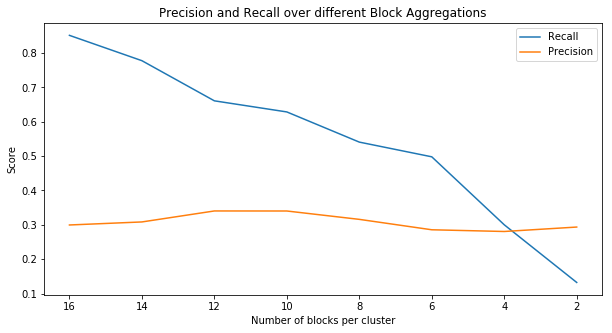

In [367]:
plt.figure(figsize=(10,5))
plt.plot(r_scores)
plt.plot(p_scores)
plt.xticks(range(0,8),clusters)
plt.xlabel('Number of blocks per cluster')
plt.ylabel('Score')
plt.legend(['Recall','Precision'])
plt.title('Precision and Recall over different Block Aggregations')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

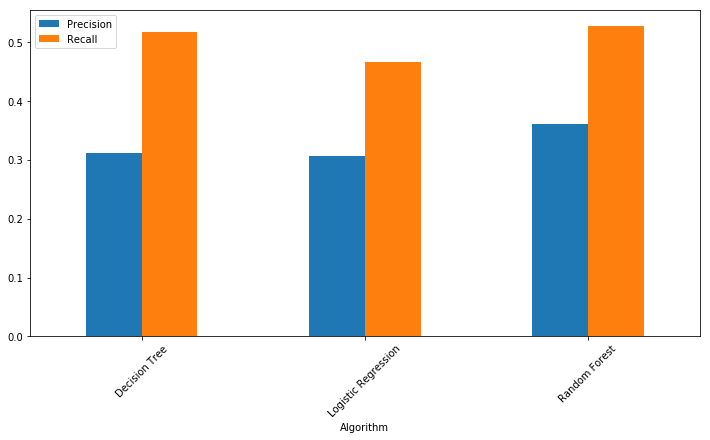

In [373]:
test = pd.DataFrame({'Algorithm':['Decision Tree',
                          'Random Forest',
                          'Logistic Regression'],
             'Precision':[0.3120989930466952,0.3611030447558085,0.3065573649044561],
             'Recall':[0.5183693540830966,0.5283088575646517,0.46654051976010985]})

test.groupby('Algorithm').sum().plot(kind = 'bar',
                                    figsize = (12,6))
plt.xticks(rotation=45)